### VOC0712数据集下载到/data目录下(自用)

In [1]:
'''
!!自用,如需同样使用需：
1. pip install kaggle
2. 从kaggle官网上申请api token并将生成文件放到服务器
但建议使用其他方法准备数据
'''
!mkdir data2
%cd data2
!kaggle datasets download -d sovitrath/voc-07-12 -w --unzip 
%cd ..

/home/newdisk/jxh/课程项目/CV期末PJ/mmdetection/data2
100%|█████████████████████████████████████▉| 2.86G/2.86G [08:52<00:00, 7.52MB/s]
100%|██████████████████████████████████████| 2.86G/2.86G [08:52<00:00, 5.77MB/s]
/home/newdisk/jxh/课程项目/CV期末PJ/mmdetection


### 预训练模型下载

In [ ]:
# 新建checkpoints
!mkdir checkpoints
# COCO上Faster R-CNN骨干r50预训练数据
!wget -c http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth -O checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
# COCO上mask R-CNN骨干r50预训练数据
!wget -c http://download.openmmlab.com/mmdetection/v2.0/cascade_rcnn/cascade_mask_rcnn_r50_fpn_1x_coco/cascade_mask_rcnn_r50_fpn_1x_coco_20200203-9d4dcb24.pth -O checkpoints/cascade_mask_rcnn_r50_fpn_1x_coco_20200203-9d4dcb24.pth
# ImageNet上r50预训练数据
!wget -c  https://download.pytorch.org/models/resnet50-19c8e357.pth -O checkpoints/resnet50-19c8e357.pth



### 验证项目是否可以正常运行

初始化检测器..
load checkpoint from local path: checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
推理演示图像..


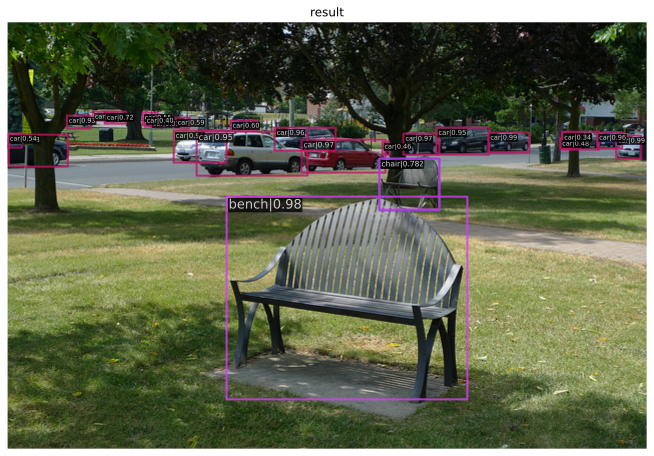

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from mmdet.apis import init_detector, inference_detector,show_result_pyplot  
config_file = 'MyConfigs/template_frcnn_r50_coco.py'  
checkpoint_file = 'checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'  
device = 'cpu'  
print('初始化检测器..')
model = init_detector(config_file, checkpoint_file, device=device)  
print('推理演示图像..') 
result = inference_detector(model, 'demo.jpg')  
show_result_pyplot(model,'demo.jpg', result, score_thr=0.3)  

### 展示骨干网络结构

In [1]:
import mmcv
from mmcv.runner import load_checkpoint
from mmdet.apis import inference_detector, show_result_pyplot
from mmdet.models import build_detector

config = 'Myonfigs/template_frcnn_r50_coco.py'  
checkpoint = 'checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'  

# Set the device to be used for evaluation
device = 'cuda:2'

# Load the config
config = mmcv.Config.fromfile(config)
# Set pretrained to be None since we do not need pretrained model here
config.model.pretrained = None

print('Initialize the detector..')
model = build_detector(config.model)

# Load checkpoint
checkpoint = load_checkpoint(model, checkpoint, map_location=device)

# Set the classes of models for inference
model.CLASSES = checkpoint['meta']['CLASSES']

# We need to set the model's cfg for inference
model.cfg = config

# Convert the model to GPU
model=model.to(device)
print('model constructed!')

# # Convert the model into evaluation mode
model.eval()

Initialize the detector..
load checkpoint from local path: checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
model constructed!


FasterRCNN(
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
        

### 自训练模型对demo图片的检测对比
需要先从[网盘](https://drive.google.com/drive/folders/1k0FZvu4UJodcFp7113v2l3JpxyvS8muZ?usp=sharing)下载模型并放到checkpoints文件夹中
1. coco预训练

初始化检测器..
load checkpoint from local path: checkpoints/coco_best.pth
推理演示图像..


/home/newdisk/jxh/anaconda/envs/mmlab3/lib/python3.8/site-packages/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(


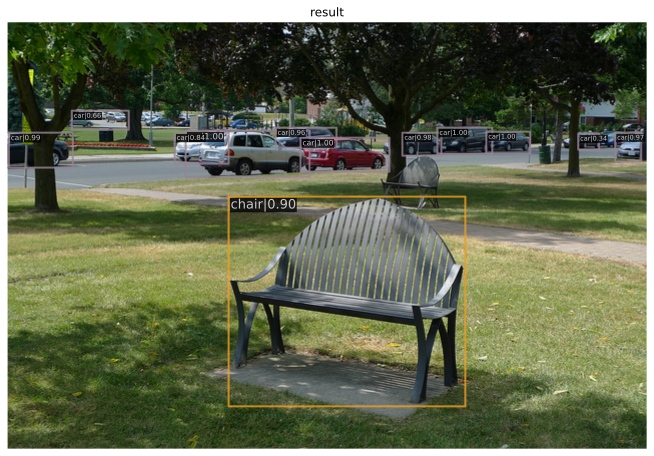

In [6]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from mmdet.apis import init_detector, inference_detector,show_result_pyplot  
config = 'MyConfigs/Setting_COCOpretrain.py'  
checkpoint = 'checkpoints/coco_best.pth' 
device= 'cpu'

print('初始化检测器..')
model = init_detector(config, checkpoint, device=device)  

print('推理演示图像..') 
result = inference_detector(model, 'demo.jpg')  
show_result_pyplot(model,'demo.jpg', result, score_thr=0.3)  

2. ImageNet预训练

初始化检测器..
load checkpoint from local path: checkpoints/ImageNet_best.pth
推理演示图像..


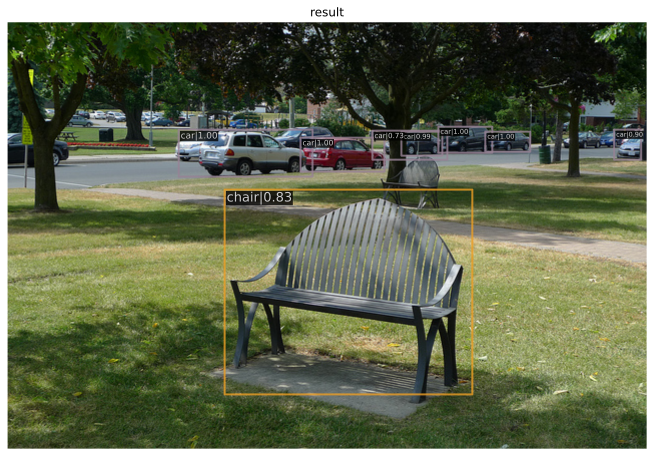

In [8]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from mmdet.apis import init_detector, inference_detector,show_result_pyplot  
config = 'MyConfigs/Setting_ImageNetpretrain.py'  
checkpoint = 'checkpoints/ImageNet_best.pth' 
device= 'cpu'

print('初始化检测器..')
model = init_detector(config, checkpoint, device=device)  

print('推理演示图像..') 
result = inference_detector(model, 'demo.jpg')  
show_result_pyplot(model,'demo.jpg', result, score_thr=0.3)  

3. 随机初始化

初始化检测器..
load checkpoint from local path: checkpoints/init_best.pth
推理演示图像..


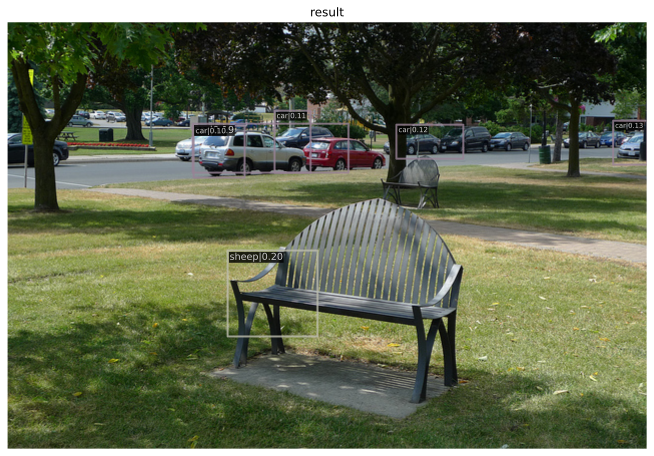

In [11]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from mmdet.apis import init_detector, inference_detector,show_result_pyplot  
config = 'MyConfigs/Setting_init_train.py'  
checkpoint = 'checkpoints/init_best.pth' 
device= 'cpu'

print('初始化检测器..')
model = init_detector(config, checkpoint, device=device)  

print('推理演示图像..') 
result = inference_detector(model, 'demo.jpg')  
show_result_pyplot(model,'demo.jpg', result, score_thr=0.1) 